In [1]:
# import libs
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
# sns.set_palette(sns.color_palette("Paired"))

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']#指定默认字体  
mpl.rcParams['axes.unicode_minus'] =False # 解决保存图像是负号'-'显示为方块的问题
#sns.axes_style()，可以看到是否成功设定字体为微软雅黑。

sns.set_context("talk")

import sys
sys.path.append('..')

import pyasset.optimizer as opt

In [2]:
# import libs
from pyasset.estimator import Estimator
from pyasset.allocation import Allocation
from pyasset.backtest import Backtest
from pyasset.config import TRADING_DAYS_A_YEAR
from pyasset.xray import Xray

In [3]:
db = pd.HDFStore('forcast.h5')
expanding_forcast = db['expanding_forcast']
rolling_forcast = db['rolling_forcast']
asset_ind = db['asset_ind']

rolling_forcast.columns = [a[:-4] for a in rolling_forcast.columns]
expanding_forcast.columns = [a[:-4] for a in expanding_forcast.columns]

db

<class 'pandas.io.pytables.HDFStore'>
File path: forcast.h5
/asset_ind                    frame        (shape->[1,16])  
/asset_ret                    frame        (shape->[151,14])
/expanding_forcast            frame        (shape->[151,11])
/rolling_forcast              frame        (shape->[151,11])

In [4]:
asset_ind = asset_ind.rename(columns={'上海金交所黄金现货:收盘价:Au9999': '上海金交所黄金现货'})

In [5]:
asset_ind.columns

Index(['沪深300指数', '上证50指数', '中证500指数', '恒生指数', '美国:标准普尔500指数', '中债国债总指数',
       '中债信用债总指数', '中证基金指数:货币基金', '南华综合指数', '南华工业品指数', '南华农产品指数', '南华金属指数',
       '南华能化指数', '南华贵金属指数', '上海金交所黄金现货', '定期存款利率:1年(整存整取)'],
      dtype='object')

# 选定需要配置的资产

In [6]:
# asset_select = ['上证50指数', '中证500指数', '中债国债总指数', '中债信用债总指数', '南华工业品指数', '南华农产品指数', '上海金交所黄金现货']

# asset_select = ['沪深300指数', '中证500指数', '中债国债总指数', '中债信用债总指数', '南华综合指数']

asset_select = ['上证50指数', '中证500指数', '中债国债总指数', '中债信用债总指数', '南华综合指数']

fee_rate=0

rolling_forcast = rolling_forcast[asset_select]
expanding_forcast = expanding_forcast[asset_select]

In [7]:
start_dt = '2013-02-01'
end_dt = '2017-05-31'

trading_days = asset_ind['沪深300指数'].dropna()
trading_days = trading_days.index
asset_ind = asset_ind.reindex(trading_days)

# asset_ind = asset_ind.fillna(method='ffill')
asset_ind = asset_ind[start_dt:end_dt]
asset_ret = asset_ind.pct_change()
asset_ret = asset_ret[start_dt: end_dt]
asset_ret = asset_ret[expanding_forcast.columns]


In [8]:
asset_ret

,上证50指数,中证500指数,中债国债总指数,中债信用债总指数,南华综合指数
date,,,,,
2013-02-01,NaN,NaN,NaN,NaN,NaN
2013-02-04,0.004704,-0.006656,0.000308,0.000440,0.005644
2013-02-05,0.001723,0.010413,0.000496,0.000349,-0.004405
2013-02-06,0.004612,0.006743,0.000110,0.000376,-0.001815
2013-02-07,-0.014395,0.003747,0.000141,0.000213,-0.004233
2013-02-08,-0.003004,0.014313,0.000443,0.000309,-0.000592
2013-02-18,-0.013633,0.005317,0.000717,0.002480,-0.011784
2013-02-19,-0.016630,-0.018308,-0.000017,0.000599,0.001712
2013-02-20,-0.001399,0.020784,0.001048,0.000604,-0.000534


# benchmark_result

In [9]:
# 估计参数
m_estimator = Estimator(asset_ret)
ret_xp = m_estimator.ewm(halflife=36).mean().shift(1)
ret_xp = (ret_xp+1)**TRADING_DAYS_A_YEAR - 1 # 年化

cov_xp = m_estimator.ewm(halflife=12).cov().shift(1, axis=0)
cov_xp = cov_xp * TRADING_DAYS_A_YEAR # 年化

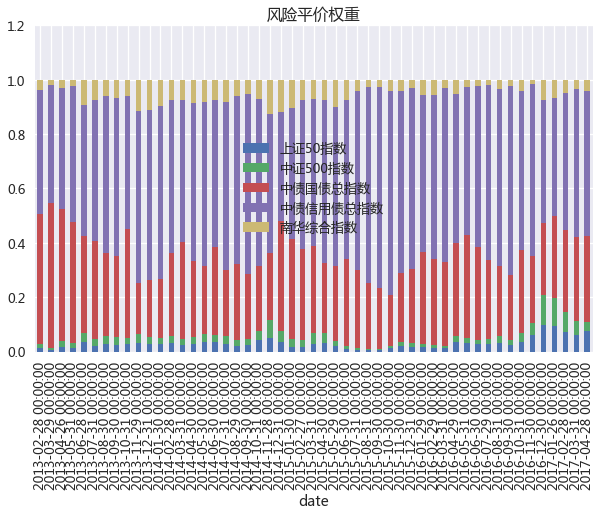

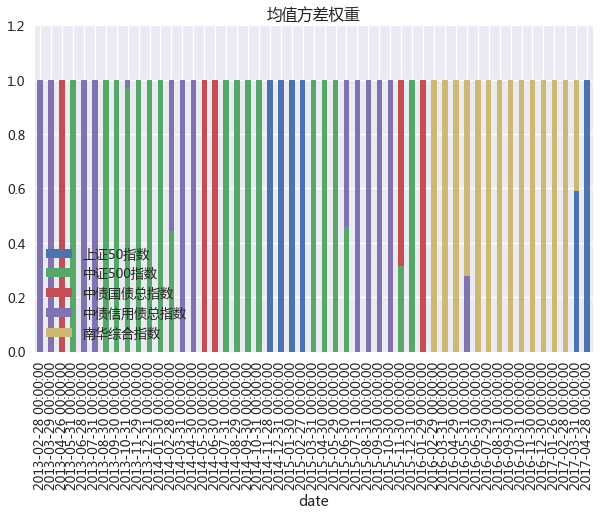

In [10]:
m_allocation = Allocation(ret_xp, cov_xp, 'm',start_dt, end_date=end_dt)
m_allocation.get_rebalance_info()

weight_m_rp = m_allocation.get_risk_parity_weight()
weight_m_mv = m_allocation.get_mean_variance_weight(tau=2, bound=[(0,1)]*asset_ret.shape[1])

weight_m_rp.plot(title='风险平价权重', kind='bar', stacked=True, figsize=(10, 6), ylim=(0,1.2))
weight_m_mv.plot(title='均值方差权重', kind='bar', stacked=True, figsize=(10, 6), ylim=(0,1.2))



,等权,均值方差,风险平价
Annal ret,6.34%,20.05%,5.14%
Annal vol,11.26%,23.54%,2.11%
Average turnover,3.33%,60.90%,12.91%
IR,0.6,0.9,2.4
Max Drawdown,-22.48%,-48.96%,-3.13%
Max_wait,478 Days,478 Days,229 Days
Mdd_end,2016-01-28,2016-01-28,2016-12-20
Mdd_range,231 Days,231 Days,23 Days
Mdd_start,2015-06-12,2015-06-12,2016-11-28


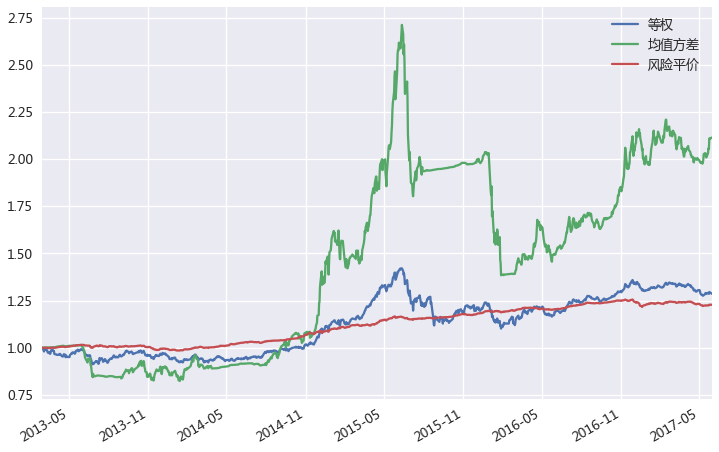

In [11]:
#  回测
back_test_result = pd.DataFrame([])
plt.figure(figsize=(12,8))

weight_m_fix = m_allocation.get_equal_weight()
b1 = Backtest(weight_m_fix, asset_ret, fee_rate=fee_rate)
back_test_result['等权'] = b1.analyze()['value']
b1.res_nv.plot(legend=True, label='等权')

b2 = Backtest(weight_m_mv, asset_ret, fee_rate=fee_rate)
back_test_result['均值方差'] = b2.analyze()['value']
b2.res_nv.plot(legend=True, label='均值方差')

b3 = Backtest(weight_m_rp, asset_ret, fee_rate=fee_rate)
back_test_result['风险平价'] = b3.analyze()['value']
b3.res_nv.plot(legend=True, label='风险平价')

back_test_result = back_test_result.sort_index()
back_test_result

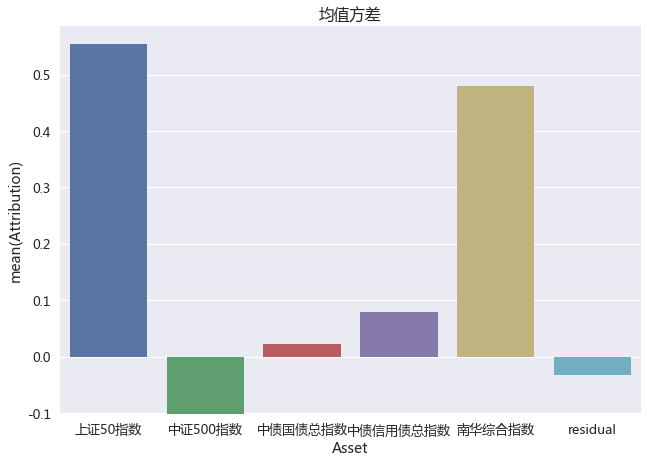

,Attribution
上证50指数,0.554490
中证500指数,-0.102410
中债国债总指数,0.021934
中债信用债总指数,0.078624
南华综合指数,0.480541
residual,-0.033179


In [12]:
xray2 = Xray(b2, strategy_name ='均值方差')
xray2.return_analyser(plot=True)

# rolling_result


In [13]:
# 估计参数
m_estimator = Estimator(asset_ret)

cov_xp = m_estimator.ewm(halflife=12).cov().shift(1, axis=0)
cov_xp = cov_xp * TRADING_DAYS_A_YEAR # 年化

rolling_forcast = rolling_forcast.dropna()
rolling_forcast = rolling_forcast[start_dt: end_dt]

rolling_forcast = rolling_forcast.reindex_like(asset_ret)
rolling_forcast = rolling_forcast.fillna(method='ffill')

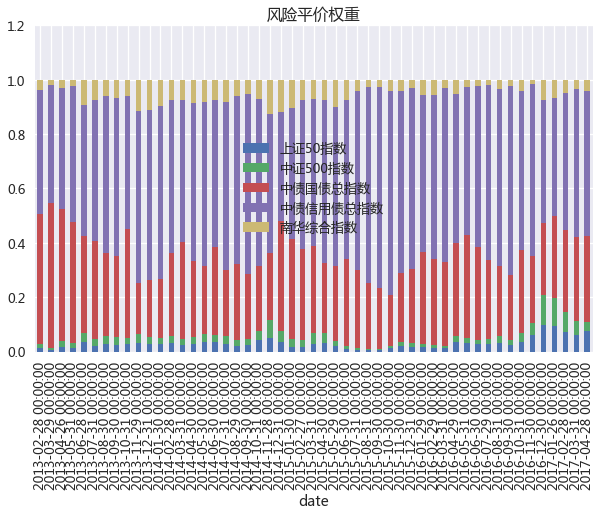

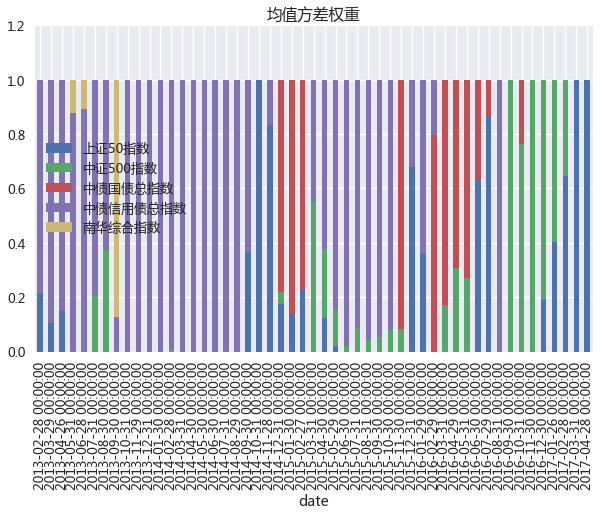

In [14]:
m_allocation = Allocation(rolling_forcast, cov_xp, 'm',start_dt, end_date=end_dt)
m_allocation.get_rebalance_info()

weight_m_rp = m_allocation.get_risk_parity_weight()
weight_m_mv = m_allocation.get_mean_variance_weight(tau=1, bound=[(0,1)]*asset_ret.shape[1])

weight_m_rp.plot(title='风险平价权重', kind='bar', stacked=True, figsize=(10, 6), ylim=(0,1.2))
weight_m_mv.plot(title='均值方差权重', kind='bar', stacked=True, figsize=(10, 6), ylim=(0,1.2))



,均值方差,风险平价
Annal ret,17.24%,5.14%
Annal vol,10.92%,2.11%
Average turnover,56.40%,12.91%
IR,1.5,2.4
Max Drawdown,-15.12%,-3.13%
Max_wait,490 Days,229 Days
Mdd_end,2016-05-18,2016-12-20
Mdd_range,358 Days,23 Days
Mdd_start,2015-05-27,2016-11-28


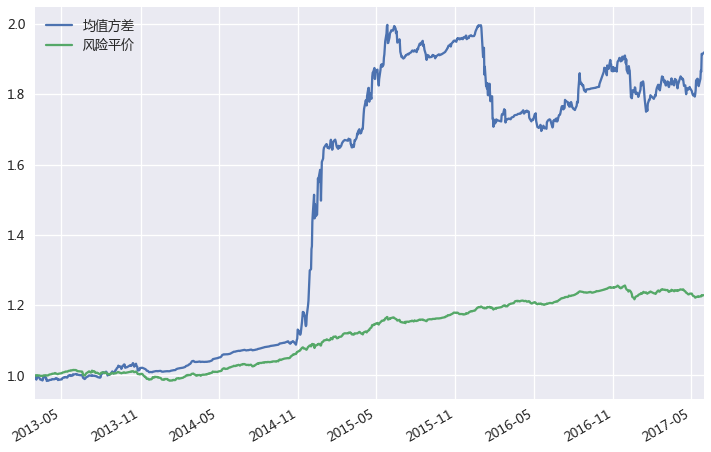

In [15]:
#  回测，千三的手续费
back_test_result = pd.DataFrame([])
plt.figure(figsize=(12,8))

b2 = Backtest(weight_m_mv, asset_ret, fee_rate=fee_rate)
back_test_result['均值方差'] = b2.analyze()['value']
b2.res_nv.plot(legend=True, label='均值方差')

b3 = Backtest(weight_m_rp, asset_ret, fee_rate=fee_rate)
back_test_result['风险平价'] = b3.analyze()['value']
b3.res_nv.plot(legend=True, label='风险平价')

back_test_result = back_test_result.sort_index()
back_test_result

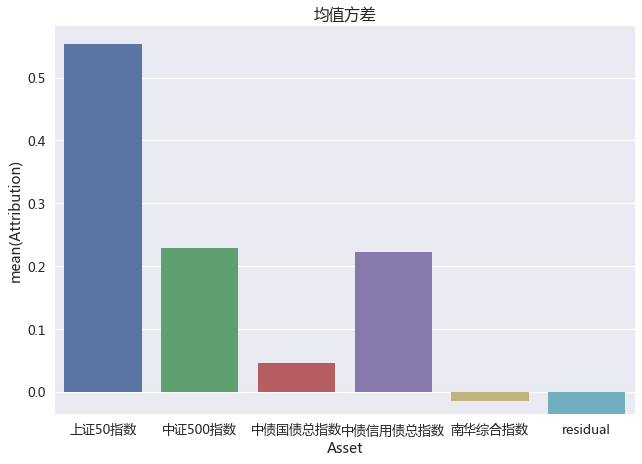

,Attribution
上证50指数,0.553373
中证500指数,0.229019
中债国债总指数,0.045756
中债信用债总指数,0.221888
南华综合指数,-0.014138
residual,-0.035899


In [16]:
xray2 = Xray(b2, strategy_name ='均值方差')
xray2.return_analyser(plot=True)

# expanding result

In [17]:
# 估计参数
m_estimator = Estimator(asset_ret)

cov_xp = m_estimator.ewm(halflife=12).cov().shift(1, axis=0)
cov_xp = cov_xp * TRADING_DAYS_A_YEAR # 年化

expanding_forcast = expanding_forcast.dropna()
expanding_forcast = expanding_forcast[start_dt: end_dt]

expanding_forcast = expanding_forcast.reindex_like(asset_ret)
expanding_forcast = expanding_forcast.fillna(method='ffill')

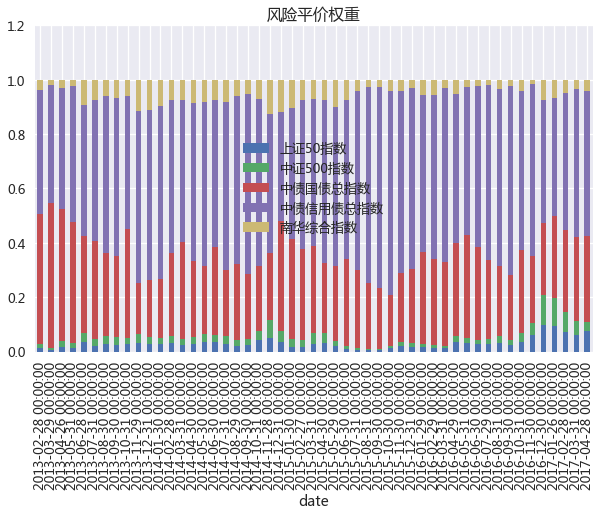

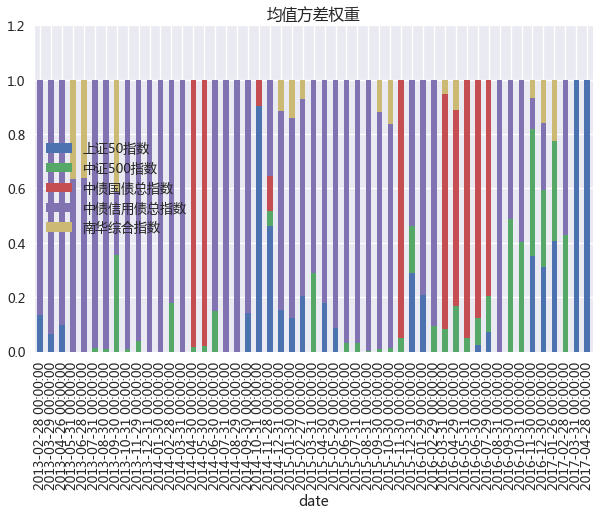

In [18]:
m_allocation = Allocation(expanding_forcast, cov_xp, 'm',start_dt, end_date=end_dt)
m_allocation.get_rebalance_info()

weight_m_rp = m_allocation.get_risk_parity_weight()
weight_m_mv = m_allocation.get_mean_variance_weight(tau=1, bound=[(0,1)]*asset_ret.shape[1])

weight_m_rp.plot(title='风险平价权重', kind='bar', stacked=True, figsize=(10, 6), ylim=(0,1.2))
weight_m_mv.plot(title='均值方差权重', kind='bar', stacked=True, figsize=(10, 6), ylim=(0,1.2))

,均值方差,风险平价
Annal ret,11.34%,5.14%
Annal vol,7.55%,2.11%
Average turnover,63.50%,12.91%
IR,1.5,2.4
Max Drawdown,-11.71%,-3.13%
Max_wait,343 Days,229 Days
Mdd_end,2016-05-25,2016-12-20
Mdd_range,148 Days,23 Days
Mdd_start,2015-12-30,2016-11-28


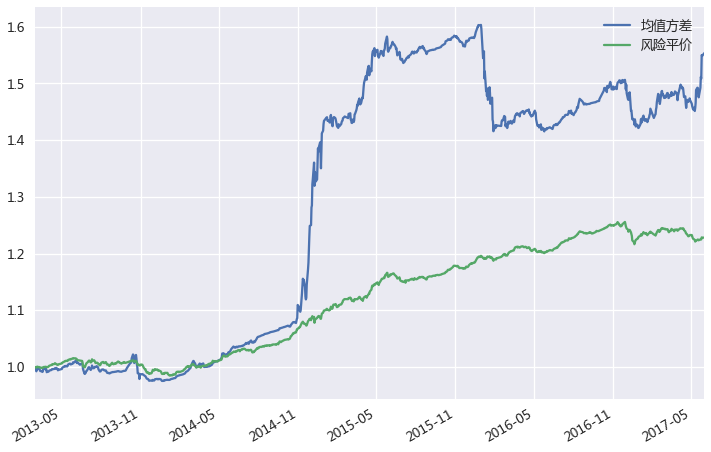

In [19]:
plt.figure(figsize=(12,8))

b2 = Backtest(weight_m_mv, asset_ret, fee_rate=fee_rate)
back_test_result['均值方差'] = b2.analyze()['value']
b2.res_nv.plot(legend=True, label='均值方差')

b3 = Backtest(weight_m_rp, asset_ret, fee_rate=fee_rate)
back_test_result['风险平价'] = b3.analyze()['value']
b3.res_nv.plot(legend=True, label='风险平价')

back_test_result = back_test_result.sort_index()
back_test_result

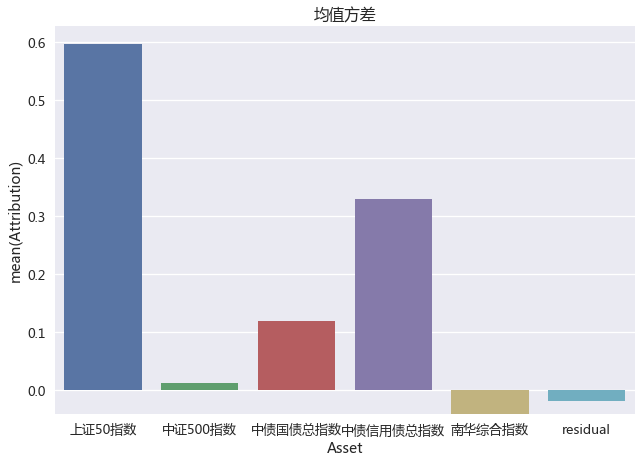

,Attribution
上证50指数,0.597267
中证500指数,0.012049
中债国债总指数,0.119416
中债信用债总指数,0.330670
南华综合指数,-0.041542
residual,-0.017860


In [20]:
xray2 = Xray(b2, strategy_name ='均值方差')
xray2.return_analyser(plot=True)